In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
# Step 2: Load the Dataset
# The 20 newsgroups dataset is available in sklearn's datasets
newsgroups = fetch_20newsgroups(subset='all')

In [3]:
# Step 3: Preprocess the Data
# Use TfidfVectorizer to convert text data to a matrix of token counts
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In [4]:
# Step 4: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [5]:
# Step 5: Train the Multinomial Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [6]:
# Step 6: Evaluate the Model
y_pred = model.predict(X_test)

In [7]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8777


In [8]:
# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred,
target_names=newsgroups.target_names))

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.85      0.85      0.85       151
           comp.graphics       0.88      0.84      0.86       202
 comp.os.ms-windows.misc       0.86      0.85      0.85       195
comp.sys.ibm.pc.hardware       0.64      0.85      0.73       183
   comp.sys.mac.hardware       0.94      0.87      0.90       205
          comp.windows.x       0.95      0.85      0.90       215
            misc.forsale       0.93      0.72      0.81       193
               rec.autos       0.91      0.94      0.92       196
         rec.motorcycles       0.89      0.95      0.92       168
      rec.sport.baseball       0.95      0.95      0.95       211
        rec.sport.hockey       0.90      0.99      0.94       198
               sci.crypt       0.91      0.97      0.93       201
         sci.electronics       0.92      0.82      0.86       202
                 sci.med       0.97      0.93      

In [9]:
# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[129   0   0   0   0   0   0   0   0   0   0   0   0   0   2  16   2   1
    1   0]
 [  0 170   5  10   0   4   1   0   1   2   0   2   0   0   2   3   0   2
    0   0]
 [  0   5 165  18   0   3   0   1   1   0   0   0   0   0   2   0   0   0
    0   0]
 [  0   3   8 156   7   0   2   1   0   0   1   1   3   0   1   0   0   0
    0   0]
 [  0   0   3  10 179   1   1   2   0   0   1   3   3   0   2   0   0   0
    0   0]
 [  0   9   2   7   1 182   0   0   5   1   2   1   0   0   4   0   1   0
    0   0]
 [  0   0   2  27   0   0 138   9   2   2   2   1   5   1   2   1   1   0
    0   0]
 [  0   1   0   0   0   0   1 184   3   0   1   0   1   1   1   1   2   0
    0   0]
 [  0   0   0   1   0   0   3   2 160   0   0   0   1   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   0   1 201   8   0   0   0   0   1   0   0
    0   0]
 [  0   0   0   1   0   0   0   0   1   0 196   0   0   0   0   0   0   0
    0   0]
 [  0   2   3   0   0   0   0   0   0   0   0 

In [15]:
# Step 7: Predict News Category
# Example news text
news_text = ["The stock market is seeing a significant increase in pricesdue to new regulations."]
news_text_transformed = vectorizer.transform(news_text)

# Predict the category
predicted_category = model.predict(news_text_transformed)
predicted_category_name =newsgroups.target_names[predicted_category[0]]
print(f"Predicted Category: {predicted_category_name}")

Predicted Category: rec.autos


In [1]:
#q2

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
# Create a sample dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

In [4]:
# Step 1: Convert categorical features into numeric format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])

In [5]:
# Step 2: Split the dataset into features and target
X = df_encoded.drop(columns=['Play'])
y = df['Play']

In [6]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Step 4: Train the Decision Tree model
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [8]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")

Model Performance:
Accuracy: 66.67%


In [10]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.67      0.80         3
         Yes       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


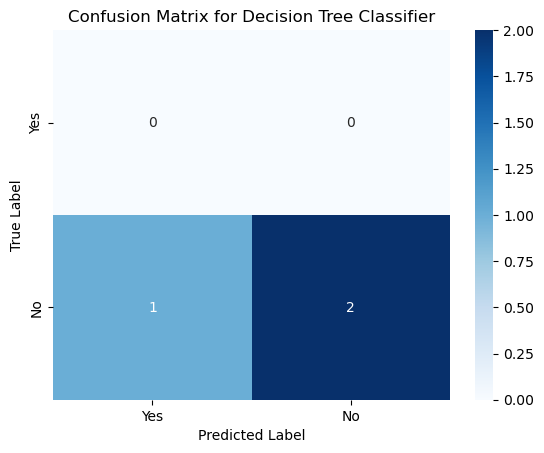

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

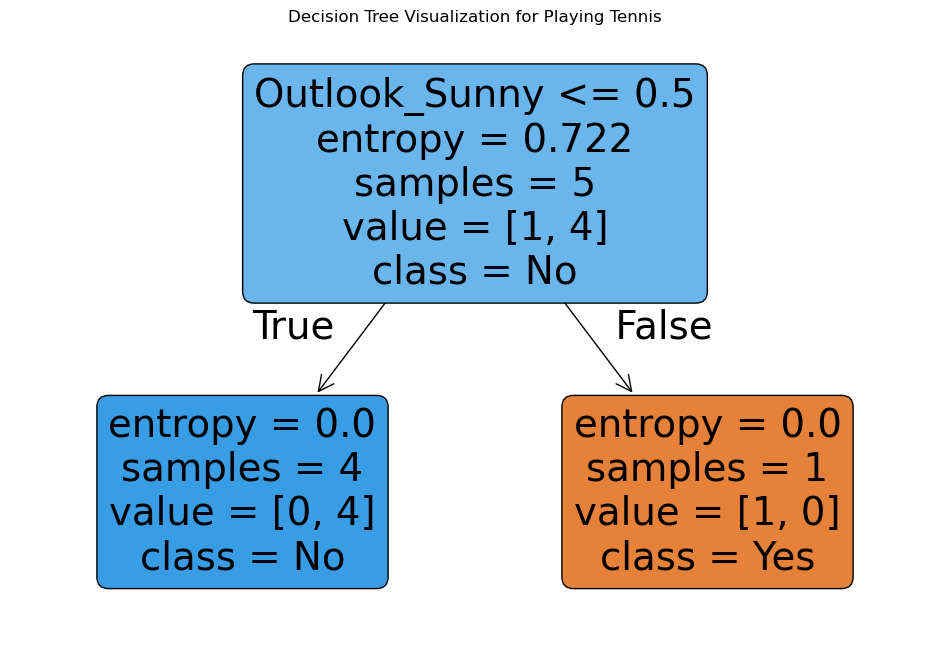

In [12]:
# Step 7: Visualize the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Yes', 'No'], filled=True, rounded=True)
plt.title("Decision Tree Visualization for Playing Tennis")
plt.show()